In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mplcursors # Use this is for creating a cursor-interactive plot with "%matplotlib notebook"
from sklearn.decomposition import NMF # Use this for training Non-negative Matrix Factorization
from sklearn.utils.extmath import randomized_svd # Use this for training Singular Value Decomposition
from sklearn.manifold import TSNE # Use this for training t-sne manifolding

In [2]:
dir = './크롤링_전처리/'
df_product = pd.read_csv(dir + 'basic_data_edit_1 (1).csv', usecols=['00.상품_URL','00.상품코드','01.브랜드','02.상품명','03.가격','04.제품 주요 사양','05.모든 성분','06.총 평점','07.리뷰 개수','08_1.별점 1점','08_2.별점 2점','08_3.별점 3점','08_4.별점 4점','08_5.별점 5점','09_1.피부타입_건성','09_2.피부타입_복합성','09_3.피부타입_지성','10_1.피부고민_보습','10_2.피부고민_진정','10_3.피부고민_주름/미백','11_1.피부자극_없음','11_2.피부자극_보통','11_3.피부자극_있음'],encoding='cp949')
df_review = pd.read_csv(dir + 'review_data_edit_2 (1).csv', usecols=['00.상품코드', '01.리뷰어 닉네임', '02_1.피부 타입','02_2.피부 톤','02_3.피부 고민','03.리뷰 평점','04.피부타입 | 피부고민 | 자극도','05.리뷰'],encoding='cp949')
print('done')

done


In [3]:
#column 이름 변경
df_review.columns = ['code','user','type','tone','problem','rating','feature','review']

In [4]:
print(df_review.loc[0]['review'])

개인적으로 성분으로 마케팅하는 제품들을 그렇게 좋아하진 않습니다. 특히 토너는 순한 제품들 사용하다보면 ‘이게 물 바르는 거랑 뭐가 다른거지?’라는 생각이 들 때도 있었고, 유해성분이 들어있지 않아도 사용 후에 피부가 뒤집어진 경험이 있기 때문에 ‘유해성분 0개’ 라며 남들이 다 좋다고 하는 제품은 오히려 구매를 재고하는 편입니다. 

그치만 아누아 어성초 토너는 달랐어요. 정제수 가득인 토너가 아니라 유해성분은 없으면서도 약모밀(어성초) 추출물이 전체 구성의 77%나 차지하기 때문에 우선 믿음이 갔고 사용감 역시 매우 만족스러웠습니다. 저는 호르몬 주기에 따라 딱딱한 여드름이 2~3개 생겼다가 급속도로 좋아지는 피부인데, 우연히 좋아지는 시기에 사용해서 그런지 몰라도 열흘 간 사용하면서 피부가 많이 진정되었음을 느꼈습니다.

저는 세안 후 스킨케어 첫 단계에서 시루콧토 화장솜에 충분히 적셔서 3번 정도 닦아주고 닦아낸 화장솜을 볼과 턱 쪽에 잠시 붙여서 토너팩처럼 사용했어요. 건성피부이기 때문에 토너 사용 후 추가적인 스킨케어는 필수였고, 어차피 건성이시라면 토너로만 마무리하진 않기 때문에 수분감은 크게 문제 없다고 느꼈습니다. 마무리감은 끈적임은 없지만 완전히 산뜻한 느낌까진 아니었어요.

재구매 의사 100%이고 사실 이미 한병 쟁여뒀어요??

+) 아누아 홈페이지에서 올영 입점 기념 환급이벤트를 해서 받은 적립금으로 어성초 앰플을 구매했는데 토너랑 궁합 진짜 최고에요. 이벤트 참여하셔서 써보는 것 완전 추천드립니다!!


In [5]:
import nltk
from konlpy.tag import Okt
Okt = Okt()

In [6]:
content_text = df_review.loc[0]['review']
tokens_ko = Okt.morphs(content_text)
tokens_ko

['개인',
 '적',
 '으로',
 '성분',
 '으로',
 '마케팅',
 '하는',
 '제품',
 '들',
 '을',
 '그렇게',
 '좋아하진',
 '않습니다',
 '.',
 '특히',
 '토너',
 '는',
 '순한',
 '제품',
 '들',
 '사용',
 '하다',
 '보면',
 '‘',
 '이',
 '게',
 '물',
 '바르는',
 '거',
 '랑',
 '뭐',
 '가',
 '다른',
 '거지',
 '?’',
 '라는',
 '생각',
 '이',
 '들',
 '때',
 '도',
 '있었고',
 ',',
 '유해',
 '성분',
 '이',
 '들어있지',
 '않아도',
 '사용',
 '후',
 '에',
 '피부',
 '가',
 '뒤집어진',
 '경험',
 '이',
 '있기',
 '때문',
 '에',
 '‘',
 '유해',
 '성분',
 '0',
 '개',
 '’',
 '라며',
 '남',
 '들',
 '이',
 '다',
 '좋다고',
 '하는',
 '제품',
 '은',
 '오히려',
 '구매',
 '를',
 '재고',
 '하는',
 '편입',
 '니',
 '다',
 '.',
 '그치만',
 '아누',
 '아',
 '어성초',
 '토너',
 '는',
 '달랐어요',
 '.',
 '정',
 '제수',
 '가득',
 '인',
 '토너',
 '가',
 '아니라',
 '유해',
 '성분',
 '은',
 '없으면서도',
 '약모밀',
 '(',
 '어성초',
 ')',
 '추출',
 '물이',
 '전체',
 '구성',
 '의',
 '77%',
 '나',
 '차지',
 '하기',
 '때문',
 '에',
 '우선',
 '믿음',
 '이',
 '갔고',
 '사',
 '용감',
 '역시',
 '매우',
 '만족스러웠습니다',
 '.',
 '저',
 '는',
 '호르몬',
 '주기',
 '에',
 '따라',
 '딱딱한',
 '여드름',
 '이',
 '2~3',
 '개',
 '생겼다가',
 '급속도',
 '로',
 '좋아지는',
 '피부',
 '인데',
 ',',
 '우연

In [7]:
ko = nltk.Text(tokens_ko)
print(len(ko.tokens))
print(len(set(ko.tokens)))

303
206


In [8]:
ko = nltk.Text(tokens_ko)
ko.vocab().most_common(100)

[('.', 9),
 ('에', 9),
 ('이', 8),
 ('토너', 7),
 ('사용', 6),
 ('는', 5),
 ('성분', 4),
 ('들', 4),
 ('을', 4),
 ('가', 4),
 ('피부', 4),
 ('때문', 4),
 ('으로', 3),
 ('하는', 3),
 ('제품', 3),
 (',', 3),
 ('유해', 3),
 ('후', 3),
 ('은', 3),
 ('어성초', 3),
 ('\r\n\r\n', 3),
 ('적', 2),
 ('‘', 2),
 ('랑', 2),
 ('개', 2),
 ('다', 2),
 ('구매', 2),
 ('를', 2),
 ('아누', 2),
 ('아', 2),
 ('인', 2),
 ('저', 2),
 ('좋아지는', 2),
 ('해서', 2),
 ('느꼈습니다', 2),
 ('스킨', 2),
 ('케어', 2),
 ('에서', 2),
 ('화장', 2),
 ('솜', 2),
 ('건성', 2),
 ('마무리', 2),
 ('감은', 2),
 ('이벤트', 2),
 ('개인', 1),
 ('마케팅', 1),
 ('그렇게', 1),
 ('좋아하진', 1),
 ('않습니다', 1),
 ('특히', 1),
 ('순한', 1),
 ('하다', 1),
 ('보면', 1),
 ('게', 1),
 ('물', 1),
 ('바르는', 1),
 ('거', 1),
 ('뭐', 1),
 ('다른', 1),
 ('거지', 1),
 ('?’', 1),
 ('라는', 1),
 ('생각', 1),
 ('때', 1),
 ('도', 1),
 ('있었고', 1),
 ('들어있지', 1),
 ('않아도', 1),
 ('뒤집어진', 1),
 ('경험', 1),
 ('있기', 1),
 ('0', 1),
 ('’', 1),
 ('라며', 1),
 ('남', 1),
 ('좋다고', 1),
 ('오히려', 1),
 ('재고', 1),
 ('편입', 1),
 ('니', 1),
 ('그치만', 1),
 ('달랐어요', 1),
 ('정', 1),
 ('

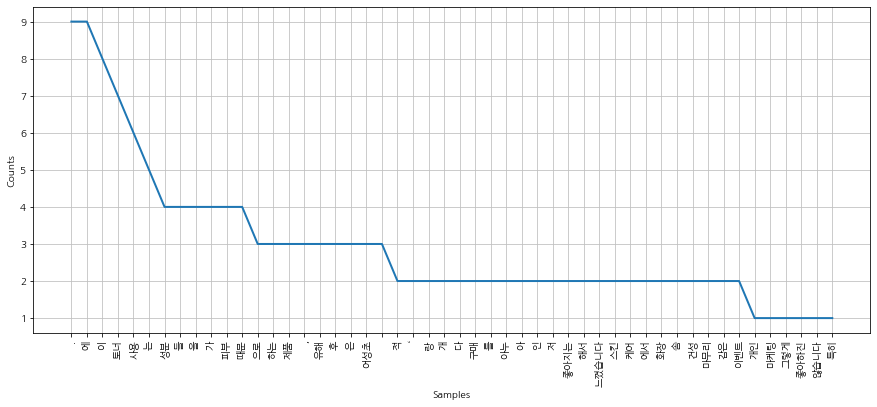

In [9]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import graphviz
from sklearn.tree import export_graphviz
plt.figure(figsize=(15,6))
plt.rc('font',family = 'NanumGothic')
ko.plot(50)
plt.show()

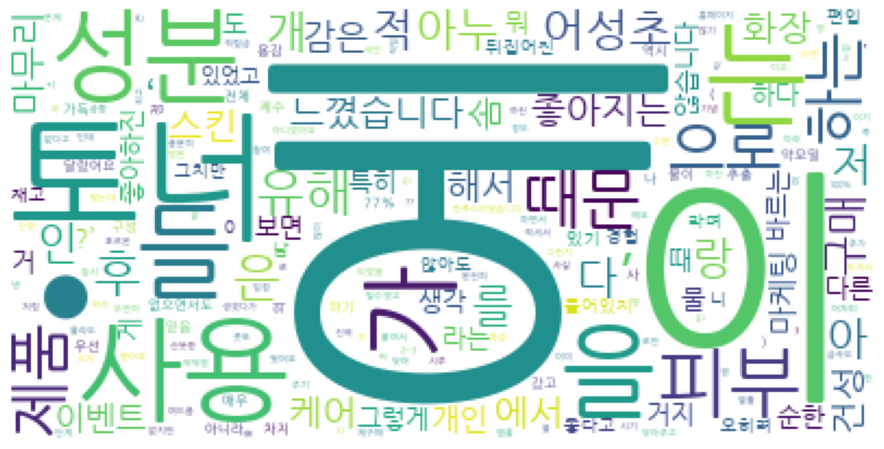

In [11]:
from wordcloud import WordCloud

wordcloud = WordCloud(font_path = '/Users/seojuan/.local/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/NanumGothic.ttf',
                    relative_scaling = 0.2,
                     background_color = 'white',
                     ).generate_from_frequencies(dict(ko.vocab()))
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [15]:
review = df_review['review']
rating = df_review['rating']

In [45]:
rating_5[:1500]

RangeIndex(start=0, stop=1500, step=1)

In [58]:
rating_5 = rating == 5
rating[rating_5][:1500]

pandas.core.series.Series

In [54]:
rating_4 = rating == 4
rating[rating_4][:1500]

97       4
99       4
109      4
117      4
118      4
        ..
10380    4
10382    4
10384    4
10393    4
10402    4
Name: rating, Length: 1500, dtype: int64

In [55]:
rating_3 = rating == 3
rating[rating_3][:1000]

188      3
190      3
193      3
202      3
219      3
        ..
28430    3
28443    3
28483    3
28531    3
28538    3
Name: rating, Length: 1000, dtype: int64

In [56]:
rating_2 = rating == 2
rating[rating_2]

161       2
191       2
194       2
372       2
390       2
         ..
157278    2
157314    2
157517    2
158173    2
158373    2
Name: rating, Length: 951, dtype: int64

In [57]:
rating_1 = rating == 1
rating[rating_1]

217       1
262       1
269       1
294       1
308       1
         ..
157161    1
157195    1
157600    1
157829    1
158090    1
Name: rating, Length: 896, dtype: int64

In [114]:
rating_5000 = pd.concat([rating[rating_5][:1500],rating[rating_4][:1500],rating[rating_3][:1000],rating[rating_2],rating[rating_1]])
rating_5000

0         5
1         5
2         5
3         5
4         5
         ..
157161    1
157195    1
157600    1
157829    1
158090    1
Name: rating, Length: 5847, dtype: int64

In [158]:
total_5000 = pd.concat([rating_5000,review],axis=1,join='inner')
total_5000_dropna = total_5000.dropna(axis=0)
total_5000_dropna

,rating,review
0,5,개인적으로 성분으로 마케팅하는 제품들을 그렇게 좋아하진 않습니다. 특히 토너는 순한...
1,5,복합성 피부에 많이 민감한 피부입니다. 요즘 봄 바람에 아침 저녁으로 기온차가 심해...
2,5,지난번 올영체험단으로 제공받아 사용해보고 너무 좋아서 다시 구매했습니당!\r\n저는...
3,5,날씨 더워지면 광대가 뜨거워지면서 내 얼굴이 호빵맨이 되어가는 것 같고 좀 더 더워...
4,5,미리 말하자면 여드름성 피부에 진정을 주려면 어성초 들어간 제품을 쓰는것아 맞구요....
...,...,...
157161,1,아 너무 아쉬워요 개봉씰이 없길래 전화해봤더니 원래 없는 제품이라네요 찝찝해서 쓸까...
157195,1,피부보습에 굉장히좋아요 쫀쫀해지는 느낌 이랄까 피부색도환해진거밭아요 재구매의사있읍니다
157600,1,유분간 있고\r\n건성에 좋을거 같아요\r\n성분도 순한데 뭐가 문제인지 모르겠지만...
157829,1,이거쓰고 피부 다 뒤집어졌는데 어디다 환불요청 해야하나요? 짜증나네요 트러블용이라서...


In [159]:
import nltk
from konlpy.tag import Okt

def star_preprocessing(value):
    if int(value) <= 3:
        return '0'
    else:
        return '1'
    
def tokenizer(text):
    okt = Okt()
    return okt.morphs(text)

In [160]:
def step1_data_preprocessing():
    df = total_5000_dropna
    df['rating'] = df['rating'].apply(star_preprocessing)
    
    text_list = df['review'].tolist()
    star_list = df['rating'].tolist()
    
    from sklearn.model_selection import train_test_split
    
    text_train, text_test, star_train, star_test = train_test_split(text_list,star_list, test_size = 0.3, random_state=42)
    
    return text_train, text_test, star_train, star_test

In [140]:
df = total_5000_dropna
print(df)

df['rating'] = df['rating'].apply(star_preprocessing)

text_list = df['review'].tolist()
star_list = df['rating'].tolist()

from sklearn.model_selection import train_test_split

text_train, text_test, star_train, star_test = train_test_split(text_list,star_list, test_size = 0.3, random_state=42)


        rating                                             review
0            5  개인적으로 성분으로 마케팅하는 제품들을 그렇게 좋아하진 않습니다. 특히 토너는 순한...
1            5  복합성 피부에 많이 민감한 피부입니다. 요즘 봄 바람에 아침 저녁으로 기온차가 심해...
2            5  지난번 올영체험단으로 제공받아 사용해보고 너무 좋아서 다시 구매했습니당!\r\n저는...
3            5  날씨 더워지면 광대가 뜨거워지면서 내 얼굴이 호빵맨이 되어가는 것 같고 좀 더 더워...
4            5  미리 말하자면 여드름성 피부에 진정을 주려면 어성초 들어간 제품을 쓰는것아 맞구요....
...        ...                                                ...
157161       1  아 너무 아쉬워요 개봉씰이 없길래 전화해봤더니 원래 없는 제품이라네요 찝찝해서 쓸까...
157195       1    피부보습에 굉장히좋아요 쫀쫀해지는 느낌 이랄까 피부색도환해진거밭아요 재구매의사있읍니다
157600       1  유분간 있고\r\n건성에 좋을거 같아요\r\n성분도 순한데 뭐가 문제인지 모르겠지만...
157829       1  이거쓰고 피부 다 뒤집어졌는데 어디다 환불요청 해야하나요? 짜증나네요 트러블용이라서...
158090       1  이제품쓰고 피부에 화장독이 올라서 두드러기가 났어요ㅠㅠ 진정시키는데 꽤오래걸렸어요 ...

[5747 rows x 2 columns]


/Users/seojuan/opt/anaconda3/envs/recommend/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [141]:
print(df)

       rating                                             review
0           1  개인적으로 성분으로 마케팅하는 제품들을 그렇게 좋아하진 않습니다. 특히 토너는 순한...
1           1  복합성 피부에 많이 민감한 피부입니다. 요즘 봄 바람에 아침 저녁으로 기온차가 심해...
2           1  지난번 올영체험단으로 제공받아 사용해보고 너무 좋아서 다시 구매했습니당!\r\n저는...
3           1  날씨 더워지면 광대가 뜨거워지면서 내 얼굴이 호빵맨이 되어가는 것 같고 좀 더 더워...
4           1  미리 말하자면 여드름성 피부에 진정을 주려면 어성초 들어간 제품을 쓰는것아 맞구요....
...       ...                                                ...
157161      0  아 너무 아쉬워요 개봉씰이 없길래 전화해봤더니 원래 없는 제품이라네요 찝찝해서 쓸까...
157195      0    피부보습에 굉장히좋아요 쫀쫀해지는 느낌 이랄까 피부색도환해진거밭아요 재구매의사있읍니다
157600      0  유분간 있고\r\n건성에 좋을거 같아요\r\n성분도 순한데 뭐가 문제인지 모르겠지만...
157829      0  이거쓰고 피부 다 뒤집어졌는데 어디다 환불요청 해야하나요? 짜증나네요 트러블용이라서...
158090      0  이제품쓰고 피부에 화장독이 올라서 두드러기가 났어요ㅠㅠ 진정시키는데 꽤오래걸렸어요 ...

[5747 rows x 2 columns]


In [161]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import pickle5 as pickle

def step2_learning(X_train, y_train, X_test, y_test):
    tfidf = TfidfVectorizer(lowercase = False, tokenizer = tokenizer)
    logistic = LogisticRegression(C=10.0,penalty = 'l2', random_state = 0)
    pipe = Pipeline([('vect',tfidf),('clf',logistic)])
    pipe.fit(X_train,y_train)
    
    y_pred = pipe.predict(X_test)
    print(accuracy_score(y_test,y_pred))
    
    with open('pipe.dat','wb') as fp :
        pickle.dump(pipe, fp)
    
    print('저장완료')

In [142]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
X_train = text_train
y_train = star_train
X_test = text_test
y_test = star_test
tfidf = TfidfVectorizer(lowercase = False, tokenizer = tokenizer)
logistic = LogisticRegression(C=10.0,penalty = 'l2', random_state = 0)
pipe = Pipeline([('vect',tfidf),('clf',logistic)])
pipe.fit(X_train,y_train)

Pipeline(steps=[('vect',
                 TfidfVectorizer(lowercase=False,
                                 tokenizer=<function tokenizer at 0x7f9d6002aae8>)),
                ('clf', LogisticRegression(C=10.0, random_state=0))])

In [144]:
from sklearn.metrics import accuracy_score
y_pred = pipe.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.8336231884057971


In [147]:
import pickle5 as pickle

with open('pipe.dat','wb') as fp :
    pickle.dump(pipe, fp)

In [148]:
with open('pipe.dat','rb') as fp:
    pipe = pickle.load(fp)

In [166]:
def step3_using_model():
    with open('pipe.dat','rb') as fp:
        pipe = pickle.load(fp)
        
        while True:
            text = input('리뷰를 작성해주세요 :')
            str = [text]
            r1 = np.max(pipe.predict_proba(str)*100)
            r2 = pipe.predict(str)[0]
            
            if r2 == '1':
                print('긍정적인 리뷰')
            else:
                print('부정적인 리뷰')
            print('정확도 : %.3f'%r1)
            

In [167]:
def learning():
    text_train, text_test, star_train, star_test = step1_data_preprocessing()
    step2_learning(text_train, star_train, text_test, star_test)
    
def using():
    step3_using_model()

In [164]:
learning()

/Users/seojuan/opt/anaconda3/envs/recommend/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0.8336231884057971
저장완료


In [ ]:
using()

리뷰를 작성해주세요 :개빡침 선물용으로 산거고 쇼핑백 증정 분명 체크했는데 쇼핑백 오지도 않고 이따위로 옴 ㅎ 어쩌란건지ㅋ
부정적인 리뷰
정확도 : 54.832
리뷰를 작성해주세요 :쇼핑백 준다고 해서 주문 했는데 설 전에 올거처럼 해서 시켰는데 오지도 않고 오늘 상품만 오고 쇼핑백은 오지도 않고 선물용인데 이게 뭔가요.. 너무 불쾌합니다
부정적인 리뷰
정확도 : 65.099
리뷰를 작성해주세요 :자극은 없는데 저랑 너무 안 맞나봐요 ㅠ후기가 남 좋아서 사ㅆ는데 완전 후회해요  촉촉하긴 한데 마무리가 뭔가 얼굴에 막이 씌여있는 것 차럼 너무너무너무 답답해요. 그리고 이틀 정도 발랐더니 얼굴에 트러블이 올라오네요 ㅠㅠ
부정적인 리뷰
정확도 : 99.666
리뷰를 작성해주세요 :여드름 지복합성 피부인데 전 안맞았어요 ㅠㅠ 처음 사보는 크림인데 후기가 좋아서 사봤어요  첫날 이튿날은 괜찮은듯하다가 얼굴에 열이 오르면서 빨갛게 오돌도돌 올라와서 놀랬어요 그 이후로 사용 중단했고 나아지고 있어요! 쑥 성분이 안맞는건지,,, 자기한테 안맞는 성분 잘 보시고 후기가 좋아도 안맞을수 있으니 테스터 해보세요!!
부정적인 리뷰
정확도 : 98.999
리뷰를 작성해주세요 :4월30일 주문할 땐 마스크팩 준다고 하고 바로드림 가능하다고 해서 했더니 다음날 바로드림  취소하고 택배보내고 쇼핑백과 스티커 샘플 4개로 변경되어 보내네요.  일처리를 일방적으로 하시는 듯. 사람들이 문의글 남겨도 업체는 무시하고..  사람들은 그 증정품 보고도 주문하지 않나요?
부정적인 리뷰
정확도 : 89.991
리뷰를 작성해주세요 :요고요고 요 한율은 뭔가 쑥으로 무장한 것 같은 초록초록한 패키지가 인상적이라 장바구니에 넣어 두고 눈여겨봤었는데,, 한정기획으로 본품 50ml에 25ml, 핸드크림, 시트마스크까지 추가증정이라 겟해보았어요!  하얀색 크림같은 제형이라 좀 꾸덕하지 않을까 했는데,, 슥~ 발랐을때에는 촉촉함 가득하니 마치 젤 크림처럼 가볍고 맑으면서 쑥향이 훅~ 치고 은은하게 올라와서 좋았어